In [1]:
%pylab inline
import orbit_cm
import particles
import truncate
from pygadgetreader import readsnap

Populating the interactive namespace from numpy and matplotlib


In [2]:
MWLMC_pos = readsnap('../../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')  
MWLMC_vel = readsnap('../../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
MWLMC_pot = readsnap('../../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pot', 'dm')
MWLMC_ids = readsnap('../../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')
MWLMC_M = readsnap('../../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'mass', 'dm')  

MWLMCHR_pos = readsnap('../../LMC-MW/data/LMCMW/UHR/MWLMC6UHR_000.hdf5', 'pos', 'dm')  
MWLMCHR_vel = readsnap('../../LMC-MW/data/LMCMW/UHR/MWLMC6UHR_000.hdf5', 'vel', 'dm')
MWLMCHR_pot = readsnap('../../LMC-MW/data/LMCMW/UHR/MWLMC6UHR_000.hdf5', 'pot', 'dm')
MWLMCHR_ids = readsnap('../../LMC-MW/data/LMCMW/UHR/MWLMC6UHR_000.hdf5', 'pid', 'dm')

In [3]:
# Selecting MW and LMC particles
MW_pos, MW_vel, LMC_pos, LMC_vel = particles.host_sat_particles(MWLMC_pos, MWLMC_vel, MWLMC_ids, 1000000)
MW_posHR, MW_velHR, LMC_posHR, LMC_velHR = particles.host_sat_particles(MWLMCHR_pos, MWLMCHR_vel, MWLMCHR_ids, 30000000)


In [4]:
# Truncating the halos at 500 kpc
MW_pos_t, MW_vel_t = truncate.truncate(MW_pos, MW_vel, 500)
MW_posHR_t, MW_velHR_t = truncate.truncate(MW_posHR, MW_velHR, 500)


In [5]:
# Computing COM of LR sim at t=0
RCM, VCM = orbit_cm.shrinking_sphere(MW_pos_t, MW_vel_t)
print(RCM)


[-0.02000348 -0.03536833 -0.01736329]


In [42]:
# Computing COM of HR sim at t=0
RCMHR, VCMHR = orbit_cm.shrinking_sphere(MW_posHR_t, MW_velHR_t)
print(RCMHR)


[ 0.01257442 -0.00553338 -0.00730978]


In [43]:
# Effect of the convergence criteria and the resolution on the COM computation
deltas = np.linspace(0.025, 10., 10)
rcm = np.zeros(len(deltas))
rcmhr = np.zeros(len(deltas))

for i in range(len(deltas)):
    RCM, VCM = orbit_cm.shrinking_sphere(MW_pos_t, MW_vel_t, delta=deltas[i])
    RCMHR, VCMHR = orbit_cm.shrinking_sphere(MW_posHR_t, MW_velHR_t, delta=deltas[i])
    rcm[i] = np.sqrt(sum(RCM**2.0))
    rcmhr[i] = np.sqrt(sum(RCMHR**2.0))
    #print(i)


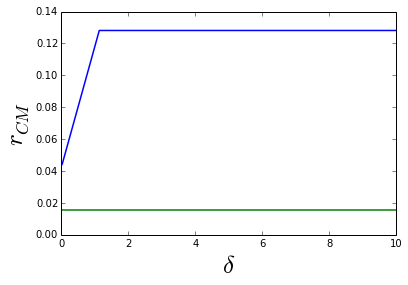

In [44]:
plot(deltas, rcm, lw=1.5)
plot(deltas, rcmhr, lw=1.5)
xlabel(r'$\delta$', fontsize=25)
ylabel('$r_{CM}$', fontsize=25)

In [20]:
%time MW_CM_pos, MW_CM_vel, LMC_CM_pos, LMC_CM_vel = orbit_cm.orbit_CM('../../LMC-MW/data/LMCMW/MWmLMC6/H1/', 'MWfLMC6H1', 0, 120, 1000000, lmc=True )

CPU times: user 14min 32s, sys: 3.9 s, total: 14min 36s
Wall time: 15min 13s


In [9]:
%time MW_CM_posHR21, MW_CM_velHR21, LMC_CM_posHR21, LMC_CM_velHR21 = orbit_cm.orbit_CM('../../LMC-MW/data/LMCMW/UHR/', '/MWLMC6UHR', 21, 21, 30000000, lmc=True )

CPU times: user 4min 2s, sys: 9.15 s, total: 4min 11s
Wall time: 5min 19s


In [10]:
%time MW_CM_posHR14, MW_CM_velHR14, LMC_CM_posHR14, LMC_CM_velHR14 = orbit_cm.orbit_CM('../../LMC-MW/data/LMCMW/UHR/', '/MWLMC6UHR', 14, 14, 30000000, lmc=True )

CPU times: user 3min 33s, sys: 3.22 s, total: 3min 37s
Wall time: 3min 50s


In [12]:
%time MW_CM_posHR7, MW_CM_velHR7, LMC_CM_posHR7, LMC_CM_velHR7 = orbit_cm.orbit_CM('../../LMC-MW/data/LMCMW/UHR/', '/MWLMC6UHR', 7, 7, 30000000, lmc=True )

CPU times: user 3min 25s, sys: 3.22 s, total: 3min 28s
Wall time: 3min 43s


In [13]:
print(MW_CM_posHR7)
print(MW_CM_posHR14)
print(MW_CM_posHR21)

[[-0.43495186  3.30087987  0.49568202]]
[[ -0.52771955  14.15151372   2.11633625]]
[[  1.42619193  37.59707205  -1.18049639]]


In [22]:
lmc_orbit = np.loadtxt('../../LMC-MW/code/LMC_orbit/orbits/LMC6_H1.txt')


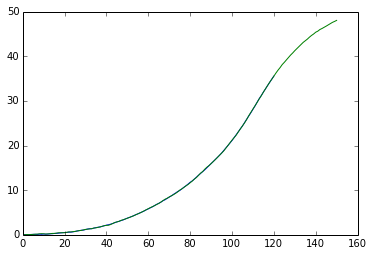

In [23]:
plot(np.sqrt(MW_CM_pos[:,0]**2.0+MW_CM_pos[:,1]**2.0+MW_CM_pos[:,2]**2.0))
plot(np.sqrt(lmc_orbit[:,5]**2.0+lmc_orbit[:,6]**2.0+lmc_orbit[:,7]**2.0))